#####  *Questions*: 
1. In total, how many percent of Indonesians are living in poverty? 
2. Trends of Garis Kemiskinan, Pengeluaran, UMP, and Upah within the last 5 years (line chart)? 
   
   *a. UMP vs Upah* 

   *b. Upah vs Pengeluaran* 
   
   *c. Upah vs Garis Kemiskinan (total)*
   
3. Projection of question number 2 (regression, time series)?
4. From the GK, Pengeluaran, UMP, and Upah dataframes, cluster the provinces and explain them in regards to the context of the dataframes. 
   (i.e. the Aceh province is considered in a median state in the context of expenses, but lead in poverty conditions.. blabla)


Dataset : https://www.kaggle.com/datasets/rezkyyayang/pekerja-sejahtera 
(Bisa cek dari gimanapun, tapi gw bakal kerjain pake yang .df.csv semua)

---

Some terms we need to know: 

- **Garis Kemiskinan (GK/gk/poverty threshold)** :
  
    Garis Kemiskinan (GK) merupakan penjumlahan dari Garis Kemiskinan Makanan (GKM) dan Garis Kemiskinan Non Makanan (GKNM). Penduduk yang memiliki rata-rata pengeluaran perkapita per bulan dibawah Garis Kemiskinan dikategorikan sebagai penduduk miskin.

    *The poverty threshold, poverty limit, poverty line, or breadline is the minimum level of income deemed adequate in a particular country. The poverty line is usually calculated by estimating the total cost of one year's worth of necessities for the average adult.*

    ![rumus Garis Kemiskinan](docs\gk_formula.png?raw=true "Garis Kemiskinan Formula")


    Sumber: 
    - image (https://pusaka.magelangkab.go.id/metadata/indikator/detailIndikator/17#:~:text=Garis%20Kemiskinan%20merupakan%20representasi%20dari,dan%20kebutuhan%20pokok%20bukan%20makanan.)
    - interpretasi (https://berkas.dpr.go.id/pa3kn/kamus/file/kamus-20.pdf)

***Data Understanding***

---

Supporting questions: 
1. What is the difference between PERKOTAAN, PERDESAAN, and PERDESAANPERKOTAAN? 
   Inferred theory:
   - Perdesaan = Villages,
   - Perkotaan = Cities, 
   - PERDESAANPERKOTAAN = Suburbs
 - Visualize difference between them in all categories later. By finding the difference between them, considering that if Perdesaan is lowest and Perkotaan is the highest, PerdesaanPerkotaan can be infered to be suburbs. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os 

os.listdir('archive')

garis_kemiskinan = pd.read_csv('archive/gk.df.csv')
pengeluaran = pd.read_csv('archive/peng.df.csv')
ump = pd.read_csv('archive/ump.df.csv')
upah  = pd.read_csv('archive/upah.df.csv')

garis_kemiskinan

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0
...,...,...,...,...,...,...
5455,INDONESIA,TOTAL,PERDESAAN,2022,SEPTEMBER,513170.0
5456,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,MARET,472525.0
5457,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,SEPTEMBER,486168.0
5458,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2022,MARET,505468.0


In [3]:
garis_kemiskinan['jenis'].unique()

array(['MAKANAN', 'NONMAKANAN', 'TOTAL'], dtype=object)

In [4]:
garis_kemiskinan['daerah'].unique()

array(['PERKOTAAN', 'PERDESAAN', 'PERDESAANPERKOTAAN'], dtype=object)

In [5]:
selected_rows = garis_kemiskinan[
    (garis_kemiskinan['provinsi'] == 'ACEH') & 
    # (garis_kemiskinan['jenis'] == 'MAKANAN') & 
    (garis_kemiskinan['daerah'] == 'PERDESAAN') & 
    (garis_kemiskinan['periode'] == 'MARET') &
    (garis_kemiskinan['tahun'] == 2015)
]

gk_makanan = selected_rows[selected_rows['jenis'] == 'MAKANAN']['gk'].sum()
gk_non = selected_rows[selected_rows['jenis'] == 'NONMAKANAN']['gk'].sum()
gk_total = selected_rows[selected_rows['jenis'] == 'TOTAL']['gk'].sum()

print((gk_makanan + gk_non) == gk_total)
print(selected_rows)
# gk_kota = selected_rows[selected_rows['daerah'] == 'PERKOTAAN']['gk'].sum()
# gk_desa = selected_rows[selected_rows['daerah'] == 'PERDESAAN']['gk'].sum() 
# gk_perkot = gk_desa = selected_rows[selected_rows['daerah'] == 'PERDESAANPERKOTAAN']['gk'].sum() 

True
    provinsi       jenis     daerah  tahun periode        gk
4       ACEH     MAKANAN  PERDESAAN   2015   MARET  297479.0
52      ACEH  NONMAKANAN  PERDESAAN   2015   MARET   84638.0
112     ACEH       TOTAL  PERDESAAN   2015   MARET  382117.0


In [6]:
pengeluaran

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0
...,...,...,...,...,...
4615,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2018,1124716.0
4616,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2019,1165240.0
4617,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2020,1225684.0
4618,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2021,1264589.0


In [7]:
pengeluaran['jenis'].unique()

array(['MAKANAN', 'NONMAKANAN', 'TOTAL'], dtype=object)

In [8]:
pengeluaran['daerah'].unique()

array(['PERDESAAN', 'PERKOTAAN', 'PERDESAANPERKOTAAN'], dtype=object)

In [9]:
pengeluaran_update = pengeluaran[pengeluaran['tahun'] >= 2015]

pengeluaran_update

,provinsi,daerah,jenis,tahun,peng
8,ACEH,PERDESAAN,MAKANAN,2015,395136.0
9,ACEH,PERDESAAN,MAKANAN,2016,412251.0
10,ACEH,PERDESAAN,MAKANAN,2017,494150.0
11,ACEH,PERDESAAN,MAKANAN,2018,506656.0
12,ACEH,PERDESAAN,MAKANAN,2019,520759.0
...,...,...,...,...,...
4615,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2018,1124716.0
4616,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2019,1165240.0
4617,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2020,1225684.0
4618,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2021,1264589.0


In [10]:
selected_rows = pengeluaran[
    (pengeluaran['provinsi'] == 'ACEH') & 
    # (pengeluaran['jenis'] == 'MAKANAN') & 
    (pengeluaran['daerah'] == 'PERDESAAN') & 
    # (pengeluaran['periode'] == 'MARET') &
    (pengeluaran['tahun'] == 2015)
]

peng_makanan = selected_rows[selected_rows['jenis'] == 'MAKANAN']['peng'].sum()
peng_non = selected_rows[selected_rows['jenis'] == 'NONMAKANAN']['peng'].sum()
peng_total = selected_rows[selected_rows['jenis'] == 'TOTAL']['peng'].sum()

print((peng_makanan + peng_non) == peng_total)
print(selected_rows)

True
   provinsi     daerah       jenis  tahun      peng
8      ACEH  PERDESAAN     MAKANAN   2015  395136.0
24     ACEH  PERDESAAN  NONMAKANAN   2015  260183.0
40     ACEH  PERDESAAN       TOTAL   2015  655319.0


In [11]:
ump

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0
...,...,...,...
730,INDONESIA,2018,2268874.0
731,INDONESIA,2019,2455662.0
732,INDONESIA,2020,2672371.0
733,INDONESIA,2021,2684743.0


In [12]:
ump_update = ump[ump['tahun'] >= 2015]

ump_update

,provinsi,tahun,ump
13,ACEH,2015,1900000.0
14,ACEH,2016,2118500.0
15,ACEH,2017,2500000.0
16,ACEH,2018,2700000.0
17,ACEH,2019,2916810.0
...,...,...,...
730,INDONESIA,2018,2268874.0
731,INDONESIA,2019,2455662.0
732,INDONESIA,2020,2672371.0
733,INDONESIA,2021,2684743.0


In [13]:
upah

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065
...,...,...,...
275,INDONESIA,2018,15275
276,INDONESIA,2019,15823
277,INDONESIA,2020,17696
278,INDONESIA,2021,18089


In [14]:
print(f'''
{upah['tahun'].unique()}
{ump_update['tahun'].unique()}
{pengeluaran_update['tahun'].unique()}
{garis_kemiskinan['tahun'].unique()}''')


[2015 2016 2017 2018 2019 2020 2021 2022]
[2015 2016 2017 2018 2019 2020 2021 2022]
[2015 2016 2017 2018 2019 2020 2021 2022]
[2015 2016 2017 2018 2019 2020 2021 2022 2013 2014]


In [15]:
garis_kemiskinan_update = garis_kemiskinan[garis_kemiskinan['tahun'] >= 2015]

garis_kemiskinan_update['tahun'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [16]:
print(f'''
{upah.isnull().sum()}
{ump_update.isnull().sum()}
{pengeluaran_update.isnull().sum()}
{garis_kemiskinan_update.isnull().sum()}''')


provinsi    0
tahun       0
upah        0
dtype: int64
provinsi    0
tahun       0
ump         0
dtype: int64
provinsi     0
daerah       0
jenis        0
tahun        0
peng        24
dtype: int64
provinsi     0
jenis        0
daerah       0
tahun        0
periode      0
gk          48
dtype: int64


In [17]:
garis_kemiskinan_update

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0
...,...,...,...,...,...,...
5455,INDONESIA,TOTAL,PERDESAAN,2022,SEPTEMBER,513170.0
5456,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,MARET,472525.0
5457,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,SEPTEMBER,486168.0
5458,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2022,MARET,505468.0


In [18]:
# gk_check = garis_kemiskinan_update[garis_kemiskinan_update['gk'].isnull()]
# x = gk_check[gk_check['jenis'] == 'TOTAL']
# gk_check['tahun'].unique()
# gk_check['daerah'].unique()

# source: 
# https://jakarta.bps.go.id/indicator/23/645/1/garis-kemiskinan-jumlah-dan-persentase-penduduk-miskin-di-daerah-menurut-kabupaten-kota-di-provinsi-dki-jakarta.html
imputted_gk = {
    2015 : 487288.0,
    2016 : 510359.0,
    2017 : 536546.0, 
    2018 : 593108.0,
    2019 : 637260.0, 
    2020 : 680401.0, 
    2021 : 697638.0, 
    2022: 738955.0
}

gk_check = garis_kemiskinan_update[garis_kemiskinan_update['gk'].isnull() & (garis_kemiskinan_update['jenis'] == 'TOTAL')]

for tahun, value in imputted_gk.items(): 
    gk_check.loc[gk_check['tahun'] == tahun, 'gk'] = value

garis_kemiskinan_update.update(gk_check)
garis_kemiskinan_update[garis_kemiskinan_update['gk'].isnull()]

,provinsi,jenis,daerah,tahun,periode,gk
1564,DKI JAKARTA,MAKANAN,PERDESAAN,2015,MARET,NaN
1565,DKI JAKARTA,MAKANAN,PERDESAAN,2015,SEPTEMBER,NaN
1566,DKI JAKARTA,MAKANAN,PERDESAAN,2016,MARET,NaN
1567,DKI JAKARTA,MAKANAN,PERDESAAN,2016,SEPTEMBER,NaN
1576,DKI JAKARTA,MAKANAN,PERDESAAN,2017,MARET,NaN
1577,DKI JAKARTA,MAKANAN,PERDESAAN,2017,SEPTEMBER,NaN
1578,DKI JAKARTA,MAKANAN,PERDESAAN,2018,MARET,NaN
1579,DKI JAKARTA,MAKANAN,PERDESAAN,2018,SEPTEMBER,NaN
1588,DKI JAKARTA,MAKANAN,PERDESAAN,2019,MARET,NaN
1589,DKI JAKARTA,MAKANAN,PERDESAAN,2019,SEPTEMBER,NaN


In [19]:
pengeluaran_update.fillna(0, inplace= True)
pengeluaran_update.isnull().sum()

C:\Users\vian8\AppData\Local\Temp\ipykernel_5980\1292632827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pengeluaran_update.fillna(0, inplace= True)


provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64

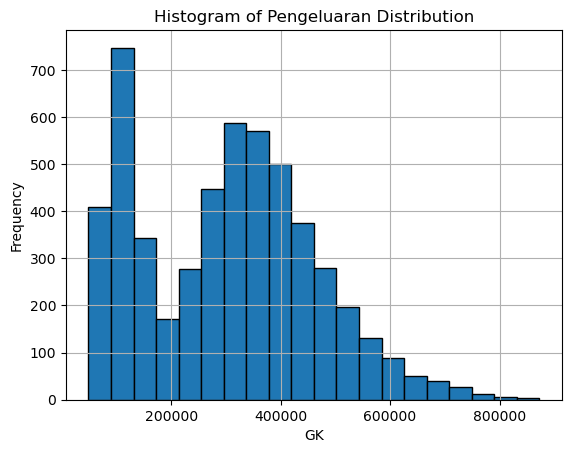

In [20]:
plt.hist(garis_kemiskinan['gk'], bins=20, edgecolor='black')
plt.xlabel('GK')
plt.ylabel('Frequency')
plt.title('Histogram of Pengeluaran Distribution')
plt.grid(True)
plt.show()

In [21]:
# pengeluaran_update['peng'][pengeluaran_update['peng'].isnull()] = 0
# print(pengeluaran_update['peng'].unique())
pengeluaran_update.fillna(0, inplace= True)
pengeluaran_update.isnull().sum()

C:\Users\vian8\AppData\Local\Temp\ipykernel_5980\1014424158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pengeluaran_update.fillna(0, inplace= True)


provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64

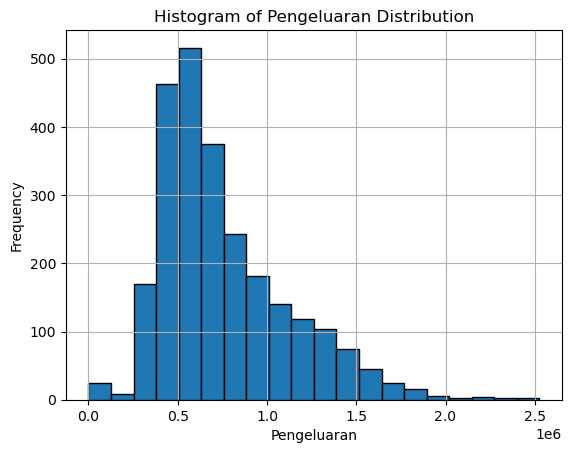

In [22]:
plt.hist(pengeluaran_update['peng'], bins=20, edgecolor='black')
plt.xlabel('Pengeluaran')
plt.ylabel('Frequency')
plt.title('Histogram of Pengeluaran Distribution')
plt.grid(True)
plt.show()

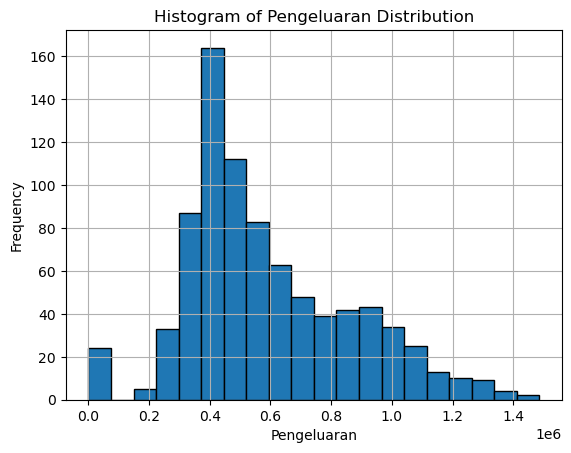

In [23]:
pengeluaran_vil = pengeluaran_update[pengeluaran_update['daerah'] == 'PERDESAAN']

plt.hist(pengeluaran_vil['peng'], bins=20, edgecolor='black')
plt.xlabel('Pengeluaran')
plt.ylabel('Frequency')
plt.title('Histogram of Pengeluaran Distribution')
plt.grid(True)
plt.show()

***Historical Trend Analysis***

--- 

Since the earliest year that is available in all dataset is 2015, the year is chosen for consistency analysis. 

In [24]:
print(f'''
Garis Kemiskinan DataFrame: 
{garis_kemiskinan_update.head(10)}
\n
Pengeluaran DataFrame:
{pengeluaran_update.head(10)}
\n
UMP DataFrame
{ump_update.head(10)}
\n
Upah DataFrame:
{upah.head(10)}''')


Garis Kemiskinan DataFrame: 
  provinsi    jenis              daerah  tahun    periode        gk
0     ACEH  MAKANAN           PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN           PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN           PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN           PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN           PERDESAAN   2015      MARET  297479.0
5     ACEH  MAKANAN           PERDESAAN   2015  SEPTEMBER  306737.0
6     ACEH  MAKANAN           PERDESAAN   2016      MARET  315697.0
7     ACEH  MAKANAN           PERDESAAN   2016  SEPTEMBER  324854.0
8     ACEH  MAKANAN  PERDESAANPERKOTAAN   2015      MARET  296406.0
9     ACEH  MAKANAN  PERDESAANPERKOTAAN   2015  SEPTEMBER  305428.0


Pengeluaran DataFrame:
   provinsi     daerah       jenis  tahun      peng
8      ACEH  PERDESAAN     MAKANAN   2015  395136.0
9      ACEH  PERDESAAN     MAKANAN   2016  412251.0
10     ACEH  PERDESAAN     MAKANAN   2017

In [25]:
garis_kemiskinan_update.shape

(5040, 6)

In [26]:
gk_total = garis_kemiskinan_update[garis_kemiskinan_update['jenis'] == 'TOTAL']
gk_total
# gk_agg = garis_kemiskinan_update.groupby(['provinsi', 'tahun'])['gk'].sum().reset_index()
# gk_agg = gk_agg.sort_values(by= ['provinsi', 'tahun'])
# gk_agg

,provinsi,jenis,daerah,tahun,periode,gk
108,ACEH,TOTAL,PERKOTAAN,2015,MARET,410414.0
109,ACEH,TOTAL,PERKOTAAN,2015,SEPTEMBER,420324.0
110,ACEH,TOTAL,PERKOTAAN,2016,MARET,427970.0
111,ACEH,TOTAL,PERKOTAAN,2016,SEPTEMBER,445488.0
112,ACEH,TOTAL,PERDESAAN,2015,MARET,382117.0
...,...,...,...,...,...,...
5455,INDONESIA,TOTAL,PERDESAAN,2022,SEPTEMBER,513170.0
5456,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,MARET,472525.0
5457,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,SEPTEMBER,486168.0
5458,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2022,MARET,505468.0


In [27]:
gk_dar = gk_total.groupby(['provinsi', 'daerah', 'tahun'])['gk'].sum().reset_index()
gk_dar = gk_dar.sort_values(by= ['provinsi', 'tahun'])
print(gk_dar)
# gk_dar

           provinsi              daerah  tahun         gk
0              ACEH           PERDESAAN   2015   776536.0
8              ACEH  PERDESAANPERKOTAAN   2015   791922.0
16             ACEH           PERKOTAAN   2015   830738.0
1              ACEH           PERDESAAN   2016   819811.0
9              ACEH  PERDESAANPERKOTAAN   2016   835721.0
..              ...                 ...    ...        ...
830  SUMATERA UTARA  PERDESAANPERKOTAAN   2021  1063067.0
838  SUMATERA UTARA           PERKOTAAN   2021  1099522.0
823  SUMATERA UTARA           PERDESAAN   2022  1097967.0
831  SUMATERA UTARA  PERDESAANPERKOTAAN   2022  1153029.0
839  SUMATERA UTARA           PERKOTAAN   2022  1198448.0

[840 rows x 4 columns]


In [28]:
gk_agg = gk_dar.groupby(['provinsi', 'tahun'])['gk'].agg(gk_avg= 'mean', gk_max= 'max').reset_index()
gk_agg = gk_agg.sort_values(by= ['provinsi', 'tahun'])

gk_agg['gk_avg'] = gk_agg['gk_avg'].round(1)
gk_agg


,provinsi,tahun,gk_avg,gk_max
0,ACEH,2015,799732.0,830738.0
1,ACEH,2016,842996.7,873458.0
2,ACEH,2017,898686.7,937883.0
3,ACEH,2018,948787.7,983090.0
4,ACEH,2019,996016.7,1019517.0
...,...,...,...,...
275,SUMATERA UTARA,2018,886291.3,914153.0
276,SUMATERA UTARA,2019,954269.0,990205.0
277,SUMATERA UTARA,2020,1006082.0,1038747.0
278,SUMATERA UTARA,2021,1060420.3,1099522.0


In [29]:
print(pengeluaran_update.shape)
pengeluaran_total = pengeluaran_update[pengeluaran_update['jenis'] == 'TOTAL']
# print(pengeluaran_total.shape)
print(pengeluaran_total.shape)

pengeluaran_agg = pengeluaran_total.groupby(['provinsi', 'tahun'])['peng'].sum().reset_index()
pengeluaran_agg = pengeluaran_agg.sort_values(by= ['provinsi', 'tahun'])
pengeluaran_agg

(2520, 5)
(840, 5)


,provinsi,tahun,peng
0,ACEH,2015,2403737.0
1,ACEH,2016,2601520.0
2,ACEH,2017,2871016.0
3,ACEH,2018,3083019.0
4,ACEH,2019,3128927.0
...,...,...,...
275,SUMATERA UTARA,2018,2989537.0
276,SUMATERA UTARA,2019,3166258.0
277,SUMATERA UTARA,2020,3342542.0
278,SUMATERA UTARA,2021,3392998.0


In [30]:
upah

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065
...,...,...,...
275,INDONESIA,2018,15275
276,INDONESIA,2019,15823
277,INDONESIA,2020,17696
278,INDONESIA,2021,18089


In [31]:
print(f'''
{len(upah['provinsi'].unique())}
{len(ump_update['provinsi'].unique())}
{len(pengeluaran_agg['provinsi'].unique())}
{len(gk_agg['provinsi'].unique())}''')


35
35
35
35


In [32]:
print(f'''
{upah['tahun'].unique()}
{ump_update['tahun'].unique()}
{pengeluaran_agg['tahun'].unique()}
{gk_agg['tahun'].unique()}''')


[2015 2016 2017 2018 2019 2020 2021 2022]
[2015 2016 2017 2018 2019 2020 2021 2022]
[2015 2016 2017 2018 2019 2020 2021 2022]
[2015 2016 2017 2018 2019 2020 2021 2022]


In [33]:
print(f'''
{upah.isnull().sum()}
{ump_update.isnull().sum()}
{pengeluaran_agg.isnull().sum()}
{gk_agg.isnull().sum()}''')


provinsi    0
tahun       0
upah        0
dtype: int64
provinsi    0
tahun       0
ump         0
dtype: int64
provinsi    0
tahun       0
peng        0
dtype: int64
provinsi    0
tahun       0
gk_avg      0
gk_max      0
dtype: int64


In [34]:
gk_rename = {
    'provinsi' : 'province', 
    'tahun' : 'year', 
    'gk_avg' : 'poverty_line_avg', 
    'gk_max' : 'poverty_line_max'
}

pengeluaran_rename = {
    'provinsi' : 'province', 
    'tahun' : 'year', 
    'peng' : 'expenses'
}

ump_rename = {
    'provinsi' : 'province', 
    'tahun' : 'year', 
    'ump' : 'min_wage'
}

upah_rename = {
    'provinsi' : 'province', 
    'tahun' : 'year', 
    'upah' : 'wage'
}

pov_df = gk_agg.rename(columns=gk_rename)
expenses_df = pengeluaran_agg.rename(columns= pengeluaran_rename)
min_wage_df = ump_update.rename(columns= ump_rename)
wage_df = upah.rename(columns= upah_rename)

In [36]:
pov_df

,province,year,poverty_line_avg,poverty_line_max
0,ACEH,2015,799732.0,830738.0
1,ACEH,2016,842996.7,873458.0
2,ACEH,2017,898686.7,937883.0
3,ACEH,2018,948787.7,983090.0
4,ACEH,2019,996016.7,1019517.0
...,...,...,...,...
275,SUMATERA UTARA,2018,886291.3,914153.0
276,SUMATERA UTARA,2019,954269.0,990205.0
277,SUMATERA UTARA,2020,1006082.0,1038747.0
278,SUMATERA UTARA,2021,1060420.3,1099522.0


In [ ]:
expenses_df

,province,year,expenses
0,ACEH,2015,2403737.0
1,ACEH,2016,2601520.0
2,ACEH,2017,2871016.0
3,ACEH,2018,3083019.0
4,ACEH,2019,3128927.0
...,...,...,...
275,SUMATERA UTARA,2018,2989537.0
276,SUMATERA UTARA,2019,3166258.0
277,SUMATERA UTARA,2020,3342542.0
278,SUMATERA UTARA,2021,3392998.0


In [ ]:
min_wage_df

,province,year,min_wage
13,ACEH,2015,1900000.0
14,ACEH,2016,2118500.0
15,ACEH,2017,2500000.0
16,ACEH,2018,2700000.0
17,ACEH,2019,2916810.0
...,...,...,...
730,INDONESIA,2018,2268874.0
731,INDONESIA,2019,2455662.0
732,INDONESIA,2020,2672371.0
733,INDONESIA,2021,2684743.0


In [ ]:
wage_df

,province,year,wage
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065
...,...,...,...
275,INDONESIA,2018,15275
276,INDONESIA,2019,15823
277,INDONESIA,2020,17696
278,INDONESIA,2021,18089


In [37]:
pov_df.to_csv('pov_df.csv', index=False)
print('exported pov.df to pov_df.csv')

expenses_df.to_csv('expenses_df.csv', index=False)
print('exported expenses.df to expenses_df.csv')

min_wage_df.to_csv('min_wage_df.csv',index=False)
print('exported min_wage.df to min_wage_df.csv')

wage_df.to_csv('wage_df.csv', index=False)
print('exported wage.csv to wage_df.csv')

exported pov.df to pov_df.csv
exported expenses.df to expenses_df.csv
exported min_wage.df to min_wage_df.csv
exported wage.csv to wage_df.csv


*PLOT TRENDS (REGRESSION)*
1. GK - TOTAL on PERKOTAAN, PERDESAAN, PERDESAANPERKOTAAN 
2. GK - MAKANAN NONMAKANAN on PERKOTAAN, PERDESAAN, PERDESAANPERKOTA
3. PENGELUARAN - TOTAL on PERKOTAAN, PERDESAAN, PERDESAANPERKOTAAN
4. PENGELUARAN - MAKANAN NONMAKAN on PERKOTAAN, PERDESAAN, PERDESAANPERKOTAAN
5. UMP
6. Upah